# 30

In [1]:
filename = './neko.txt.mecab'  # 形態素解析結果が保存されているファイル

sentences = []  # 文全体の形態素リストを格納するリスト
morphs = []  # 1文ごとの形態素リストを格納するリスト

# ファイルを読み込み、1行ずつ解析結果を処理
with open(filename, mode='r') as f:
    for line in f:
        if line != 'EOS\n':  # 文末を示す 'EOS' でない場合
            fields = line.split('\t')  # 行をタブで分割（表層形とその他の情報に分ける）
            
            # 行が正しく分割されない場合や空行の場合はスキップ
            if len(fields) != 2 or fields[0] == '':
                continue  # 次の行へスキップ
            
            # 形態素の情報（品詞など）をカンマで分割
            attr = fields[1].split(',')
            
            # 形態素情報を辞書型に格納
            morph = {
                'surface': fields[0],  # 表層形（単語そのもの）
                'base': attr[6],       # 基本形（辞書形）
                'pos': attr[0],        # 品詞
                'pos1': attr[1]        # 品詞細分類1
            }
            morphs.append(morph)  # 形態素リストに追加
        else:  # 'EOS' に到達した場合（文の終わりを示す）
            sentences.append(morphs)  # これまでの形態素リストを文リストに追加
            morphs = []  # 新しい文に備えてリストをリセット

# 確認として、3番目の文の形態素を表示
for morph in sentences[2]:
    print(morph)


{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


# 31

In [2]:
ans = set()  # 動詞の表層形を格納するためのset（重複を排除）

# すべての文に対して処理を行う
for sentence in sentences:
  # 各文に含まれるすべての形態素をチェック
  for morph in sentence:
    # 品詞が「動詞」である場合、その表層形をsetに追加
    if morph['pos'] == '動詞':
      ans.add(morph['surface'])  # setに追加することで自動的に重複を排除

# 動詞の表層形の種類を確認
print(f'動詞の表層形の種類: {len(ans)}\n')  # 動詞の種類の数を表示

# 抽出された動詞の表層形の最初の10個を表示
for v in list(ans)[:10]:
  print(v)


動詞の表層形の種類: 3893

舐め
見廻
蒙
習っ
捻る
とく
執る
抛
並べる
跳ねのけ


# 32

In [3]:
ans = set()  # 動詞の基本形を格納するためのset（重複を排除）

# すべての文に対して処理を行う
for sentence in sentences:
  # 各文に含まれるすべての形態素をチェック
  for morph in sentence:
    # 品詞が「動詞」である場合、その基本形をsetに追加
    if morph['pos'] == '動詞':
      ans.add(morph['base'])  # 基本形をsetに追加することで自動的に重複を排除

# 動詞の基本形の種類を確認
print(f'動詞の基本形の種類: {len(ans)}\n')  # 動詞の基本形の種類を表示

# 抽出された動詞の基本形の最初の10個を表示
for v in list(ans)[:10]:
  print(v)


動詞の基本形の種類: 2300

捻る
括る
肥る
執る
並べる
とく
恐れ入る
依る
もぎとる
叩く


# 33

In [4]:
ans = set()  # 「名詞+の+名詞」のパターンを格納するためのset（重複を排除）

# すべての文に対して処理を行う
for sentence in sentences:
  # 各文に対して、1つ前と1つ後の形態素をチェックするため、インデックスを1から文の終わりまでループ
  for i in range(1, len(sentence) - 1):
    # 1つ前が「名詞」、現在が「の」、1つ後が「名詞」の場合に処理を実行
    if sentence[i - 1]['pos'] == '名詞' and sentence[i]['surface'] == 'の' and sentence[i + 1]['pos'] == '名詞':
      # 「名詞+の+名詞」を結合してセットに追加
      ans.add(sentence[i - 1]['surface'] + sentence[i]['surface'] + sentence[i + 1]['surface'])

# 「名詞+の+名詞」の種類の数を表示
print(f'「名詞+の+名詞」の種類: {len(ans)}\n')

# 抽出された「名詞+の+名詞」の例を最初の10個表示
for n in list(ans)[:10]:
  print(n)

「名詞+の+名詞」の種類: 4924

ものの重み
句の価値
令嬢の鼻
自分の手柄
尻の中
生霊の機微
円転滑脱の鈴木
内の三
あかの他人
舌の料理


# 34

In [5]:
ans = set()  # 連接名詞を格納するためのset（重複を排除）

# 文ごとに形態素を処理
for sentence in sentences:
  nouns = ''  # 名詞の連続部分を一時的に格納
  num = 0     # 名詞が連続している個数をカウント
  
  for morph in sentence:
    if morph['pos'] == '名詞':  # 名詞の場合
      nouns = ''.join([nouns, morph['surface']])  # 名詞を連結
      num += 1  # 名詞のカウントを増やす
    elif num >= 2:  # 名詞以外が出現し、2つ以上の名詞が連続していた場合
      ans.add(nouns)  # 連接名詞をsetに追加（重複排除）
      nouns = ''  # nounsをリセット
      num = 0     # カウントをリセット
    else:  # 名詞が1つ以下で連接が途切れた場合
      nouns = ''  # リセット
      num = 0     # リセット

  # 文の最後に名詞が2つ以上連続していた場合
  if num >= 2:
    ans.add(nouns)

# 連接名詞の種類といくつかの例を表示
print(f'連接名詞の種類: {len(ans)}\n')

# 最初の10個の連接名詞を表示
for n in list(ans)[:10]:
  print(n)

連接名詞の種類: 4457

三冊
かん猪口
昔堅気
四五日
洗湯界
寄り合
——爆発
咎むる事
いかん懺悔
挙ぐる


# 35

In [16]:
from collections import Counter

# すべての名詞や動詞などのコンテンツ語（機能語以外）をリストに格納
words = []
for sentence in sentences:
    for morph in sentence:
        # 機能語を除外（助詞、助動詞、記号を除く）
        if morph['pos'] not in ['助詞', '助動詞', '記号']:
            words.append(morph['surface'])  # 表層形をリストに追加

# 出現頻度をカウント
word_count = Counter(words)

# 出現頻度の高い順にソートして表示
word_count_sorted = word_count.most_common()

# 結果を表示（上位20単語を表示）
print("機能語を除いた出現頻度の高い単語（上位20件）:")
for word, freq in word_count_sorted[:20]:
    print(f"{word}: {freq}")


機能語を除いた出現頻度の高い単語（上位20件）:
し: 2259
の: 1611
いる: 1249
事: 1207
する: 992
もの: 981
君: 973
云う: 937
主人: 932
ない: 765
ある: 733
ん: 704
よう: 696
この: 649
御: 636
人: 602
その: 576
一: 554
そう: 546
何: 539


# 36

In [9]:
!pip install matplotlib
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 10.4 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=1d2739e914ce173f7d595b2b5a7c46578d0818f98c42496063779d4fdfe7a13a
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


機能語を除いた出現頻度上位10語とその出現頻度:
し: 2259
の: 1611
いる: 1249
事: 1207
する: 992
もの: 981
君: 973
云う: 937
主人: 932
ない: 765


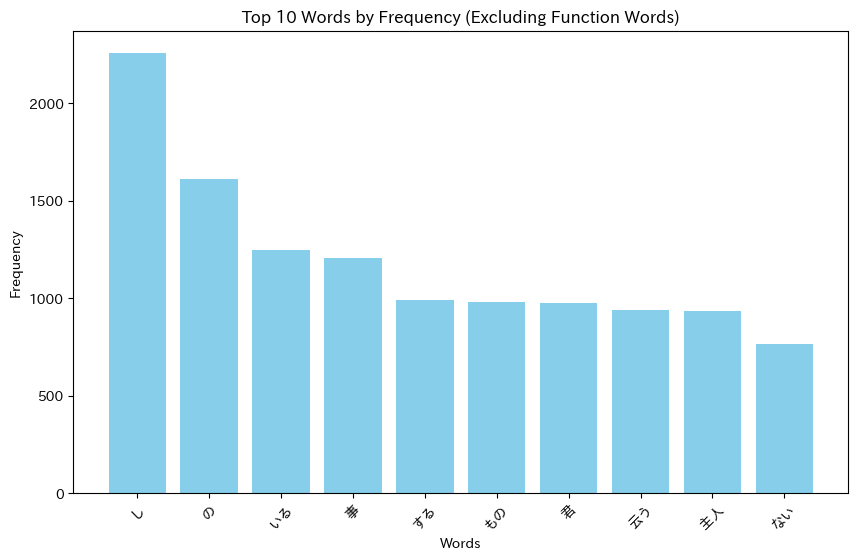

In [17]:
from collections import Counter
import matplotlib.pyplot as plt

# すべての名詞や動詞などのコンテンツ語（機能語以外）をリストに格納
words = []
for sentence in sentences:
    for morph in sentence:
        # 機能語を除外（助詞、助動詞、記号を除く）
        if morph['pos'] not in ['助詞', '助動詞', '記号']:
            words.append(morph['surface'])  # 表層形をリストに追加

# 出現頻度をカウント
word_count = Counter(words)

# 出現頻度上位10語を抽出
top_10 = word_count.most_common(10)

# 出現頻度上位10語とその頻度を表示
print("機能語を除いた出現頻度上位10語とその出現頻度:")
for word, freq in top_10:
    print(f"{word}: {freq}")

# データをグラフに表示
words, frequencies = zip(*top_10)  # それぞれのリストに分ける

# 棒グラフを描画
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words by Frequency (Excluding Function Words)')
plt.xticks(rotation=45)  # X軸のラベルを45度傾ける
plt.show()


# 37

「猫」と共起する頻度が高い10語とその出現頻度:
し: 83
事: 59
吾輩: 58
の: 55
いる: 46
ある: 42
人間: 40
この: 38
する: 38
もの: 36


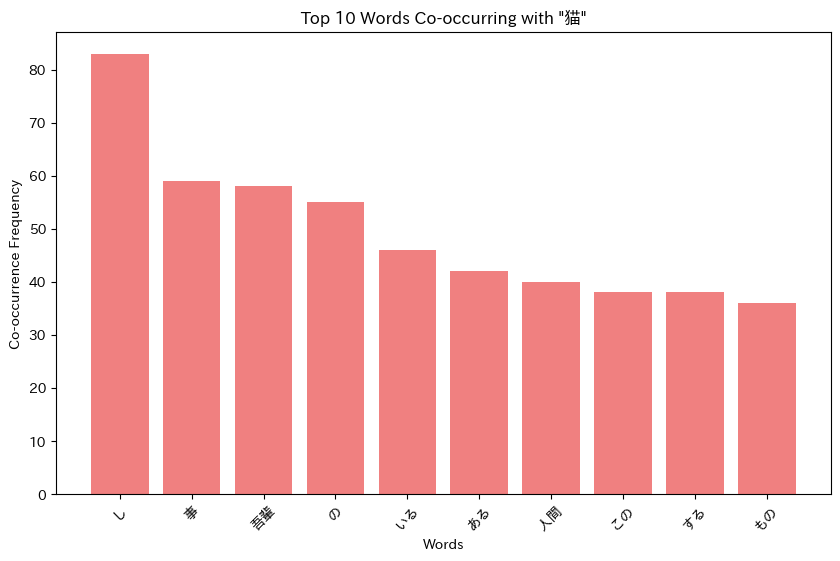

In [18]:
from collections import Counter
import matplotlib.pyplot as plt

# 「猫」が含まれる文における共起語をカウント
cooccurrence_words = []

for sentence in sentences:
    # 文に「猫」が含まれているか確認
    if any(morph['surface'] == '猫' for morph in sentence):
        for morph in sentence:
            # 「猫」自体や助詞、助動詞、記号は除外してカウント
            if morph['surface'] != '猫' and morph['pos'] not in ['助詞', '助動詞', '記号']:
                cooccurrence_words.append(morph['surface'])

# 共起語の出現頻度をカウント
cooccurrence_count = Counter(cooccurrence_words)

# 共起頻度上位10語を抽出
top_10_cooccurrence = cooccurrence_count.most_common(10)

# 共起頻度上位10語とその頻度を表示
print("「猫」と共起する頻度が高い10語とその出現頻度:")
for word, freq in top_10_cooccurrence:
    print(f"{word}: {freq}")

# データをグラフに表示
words, frequencies = zip(*top_10_cooccurrence)  # それぞれのリストに分ける

# 棒グラフを描画
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='lightcoral')
plt.xlabel('Words')
plt.ylabel('Co-occurrence Frequency')
plt.title('Top 10 Words Co-occurring with "猫"')
plt.xticks(rotation=45)  # X軸のラベルを45度傾ける
plt.show()

# 38

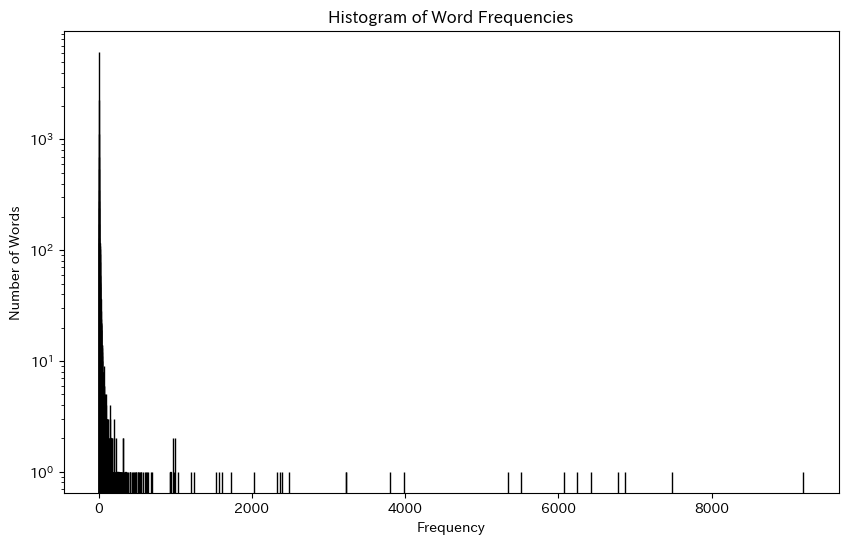

In [20]:
from collections import Counter
import matplotlib.pyplot as plt

# すべての表層形をリストに格納（機能語を除かず全単語をカウント）
words = []
for sentence in sentences:
    for morph in sentence:
        words.append(morph['surface'])  # 表層形をリストに追加

# 出現頻度をカウント
word_count = Counter(words)

# 出現頻度のリストを作成
frequencies = list(word_count.values())

# ヒストグラムの描画
plt.figure(figsize=(10, 6))
plt.hist(frequencies, bins=range(1, max(frequencies) + 1), edgecolor='black', log=True)
plt.xlabel('Frequency')
plt.ylabel('Number of Words')
plt.title('Histogram of Word Frequencies')
plt.show()


# 39

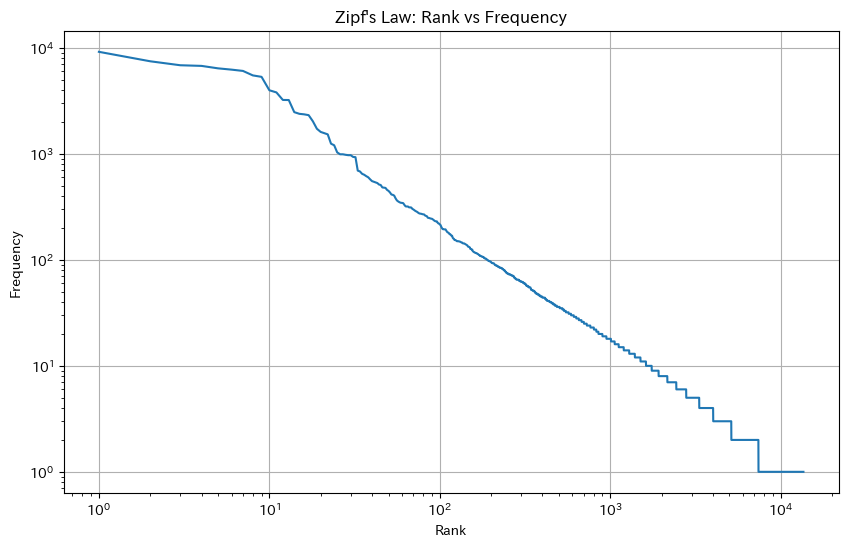

In [21]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# すべての表層形をリストに格納（機能語を除かず全単語をカウント）
words = []
for sentence in sentences:
    for morph in sentence:
        words.append(morph['surface'])  # 表層形をリストに追加

# 出現頻度をカウント
word_count = Counter(words)

# 出現頻度を高い順にソート（most_commonで自動的に降順にソートされる）
word_freq = [freq for word, freq in word_count.most_common()]

# 頻度順位を作成（順位は1から始まる）
ranks = np.arange(1, len(word_freq) + 1)

# 両対数グラフの描画
plt.figure(figsize=(10, 6))
plt.plot(ranks, word_freq)
plt.xscale('log')  # X軸を対数スケールにする
plt.yscale('log')  # Y軸を対数スケールにする
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Zipf\'s Law: Rank vs Frequency')
plt.grid(True)
plt.show()